# Estadísitica Aplicada
Seccion 8 - 8 sep 2023

Fracisco Humberto Villegas Reyna 1731722 Gpo43

In [1]:
#librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# librerias especializadas
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [5]:
## importar los datos
datos_km=pd.read_excel('ejercicio_km.xlsx')

In [7]:
datos_km.head()

,individuo,tiempo_sup,evento
0,1,6,1
1,2,6,1
2,3,6,1
3,4,7,1
4,5,10,1


In [9]:
# estimar el modelo de kaplan-meier
km1=KaplanMeierFitter().fit(datos_km['tiempo_sup'], datos_km['evento'])

In [10]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
6.0,4,3,1,0,21
7.0,1,1,0,0,17
9.0,1,0,1,0,16
10.0,2,1,1,0,15
11.0,1,0,1,0,13
13.0,1,1,0,0,12
16.0,1,1,0,0,11
17.0,1,0,1,0,10


In [11]:
km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.857143
7.0,0.806723
9.0,0.806723
10.0,0.752941
11.0,0.752941
13.0,0.690196
16.0,0.627451
17.0,0.627451


In [13]:
km1.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
6.0,0.619718,0.951552
7.0,0.563147,0.922809
9.0,0.563147,0.922809
10.0,0.503200,0.889362
11.0,0.503200,0.889362
13.0,0.431610,0.849066
16.0,0.367511,0.804912
17.0,0.367511,0.804912
19.0,0.367511,0.804912


([<matplotlib.axis.YTick at 0x1cb3dc5fa90>,
 [Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

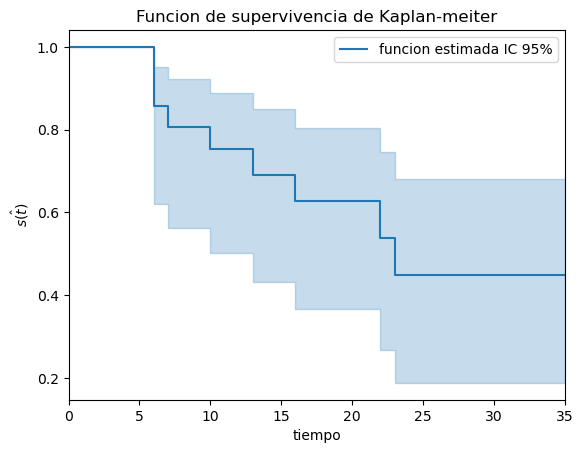

In [22]:
km1.plot_survival_function(label='funcion estimada IC 95%');
plt.xlim(0,35)
plt.title('Funcion de supervivencia de Kaplan-meiter');
plt.xlabel('tiempo')
plt.ylabel('$\hat{s(t)}$')
plt.yticks([0.2,0.4,0.6,0.8,1])

In [23]:
km1.median_survival_time_

23.0

In [24]:
relacion=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

Esta base de datos contiene la informacion de 42 individuos.La variable 't' contiene el tiempo de supervivencia de la relacion del individuo.Evento es que la relacion se termine, y se encuentra en la variable 'Estado' donde 1 es que la relacion termino y 0 es censura. La variable tratamiento toma valores de 0 y 1 , donde 0 es una persona no detallista en la relacion y 1 es un persona detallista en la relacion.El tiempo esta medido en semanas y detallista es la persona que da un regalo por semana a su pareja.

In [27]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


In [28]:
km_all=KaplanMeierFitter().fit(relacion['t'], relacion['estado'])

<Axes: xlabel='timeline'>

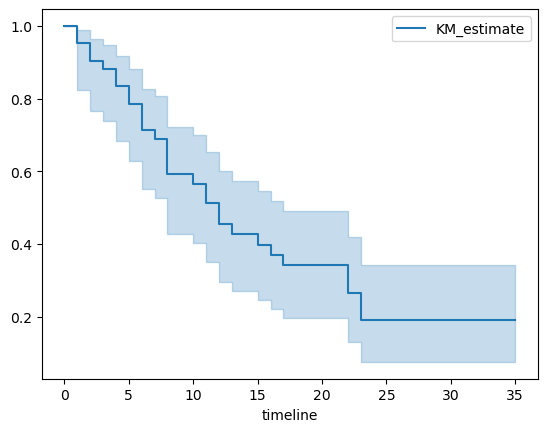

In [29]:
km_all.plot_survival_function()

In [30]:
km_all.median_survival_time_

12.0

En la semana 12 la mitad  de las relaciones han terminado

In [33]:
## vamos a separar a los detallista y no detallistas
detallistas=relacion.query('tratamiento==1')

no_detallistas=relacion.query('tratamiento==0')

In [36]:
## funciones de supervivencia para detallistas y no detallistas
km_deta=KaplanMeierFitter().fit(detallistas['t'],detallistas['estado'])
km_Nodeta=KaplanMeierFitter().fit(no_detallistas['t'], no_detallistas['estado'])

(0.0, 35.0)

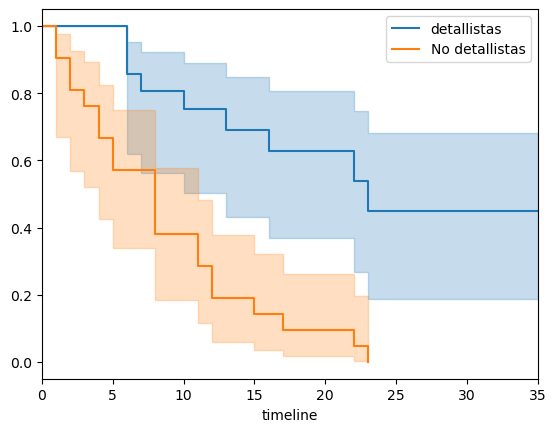

In [44]:
## graficar deta o no deta
km_deta.plot_survival_function(label='detallistas')
km_Nodeta.plot_survival_function(label='No detallistas')
plt.xlim(0,35)

prueba de hipotesis (log rank test)
 
$Ho:S(1)=S(2)$ funciones de superviviencia iguales

$Ha:S(1) \neq S(2)$ funciones de superviviencia distintas

In [47]:
LRT=logrank_test(detallistas['t'], no_detallistas['t'], detallistas['estado'],no_detallistas['estado'])
LRT.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [48]:
LRT.p_value.round(2)

0.0

Como   $p-value<\alpha$ 

Rechazamos H0 , las funciones de supervivencia son distintas , las relaciones de los no detallistas terminan mas rapido que las relaciones detallistas. La mitad de las relaciones de los no detallistas terminan a las 8 semanas y La mitad de las relaciones de los detallistas terminan a las 23 semanas

In [49]:
km_Nodeta.median_survival_time_

8.0

In [50]:
km_deta.median_survival_time_

23.0